# 决策树核心解决问题
- 找出最佳节点和最佳分枝
- 如何让决策树停止生长，防止过拟合
---
- 非参数：不限制数据的结构和类型
- 优点是便于理解
- 缺点是容易过拟合，需要剪枝
---
- 不适合处理月亮星和环形数据
![](https://gitee.com/liangxinixn/blog002/raw/master/image01/20210112124324.png)

# sklearn官网例子
- 鸢尾花数据集特征太少，可能观察不出决策树的随机性 

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [2]:
# 我把训练集拿来测试了

result = clf.score(X,y)
print(result)

1.0


## 红酒问题

In [3]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [4]:
wine = load_wine()

In [5]:
wine.data.shape

(178, 13)

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
#转换为表的形式
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
# 查看特征的名字
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
# 标签的名字
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [46]:
# 划分数据集,随机划分，划分的数据集不同，训练的模型就不同
# 注意顺序
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    wine.data
    ,wine.target
    ,test_size=0.3)

In [47]:
Xtrain.shape

(124, 13)

In [48]:
Xtest.shape

(54, 13)

In [49]:
Ytrain

array([0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1,
       2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1,
       2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1])

In [60]:
# 训练模型
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度accuracy

score

0.9814814814814815

In [72]:
# 调节参数criterion
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度accuracy

score

# 这个参数不一定谁好谁坏

0.9629629629629629

## 分类树可选参数criterion
- entropy
- gini 默认

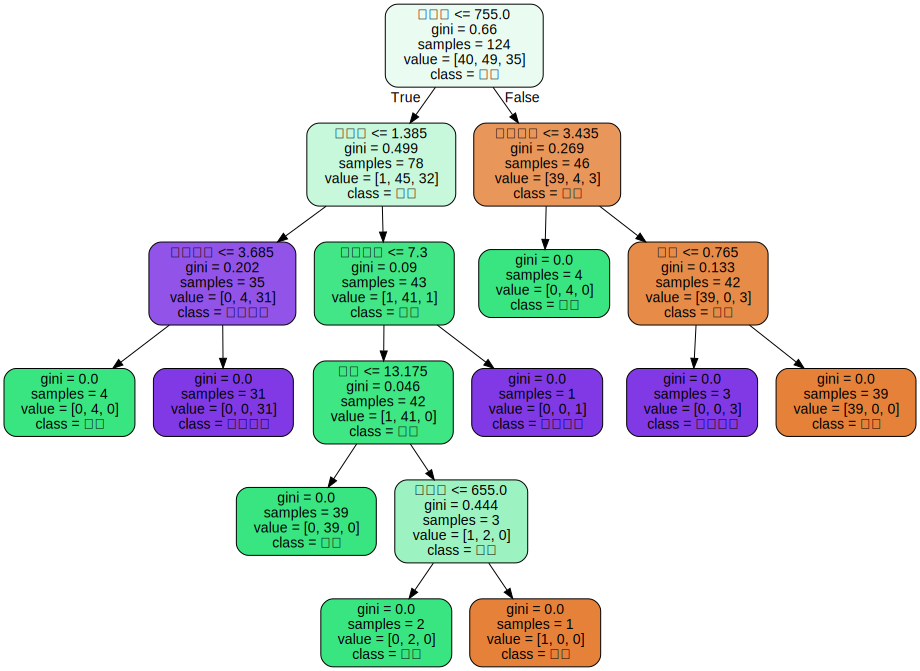

In [62]:


feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                                #,out_file="Tree.dot"
                                ,feature_names = feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                ,out_file=None
                               ) 
# 注意不要输出文件，直接显示
graph = graphviz.Source(dot_data)  
graph

In [63]:
# 每个特征的重要性
clf.feature_importances_

array([0.00756275, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34147348, 0.        , 0.        , 0.19319169,
       0.06806474, 0.        , 0.38970734])

In [64]:
# 清晰的展示
[*zip(feature_name,clf.feature_importances_)]
# 根节点的重要性是最大数
# 决策树不一定用到全部特征

[('酒精', 0.007562749237626073),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.341473478367968),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.19319168512563845),
 ('色调', 0.06806474313863478),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.38970734413013275)]

In [103]:
# 因为决策树是根据节点优化的，不能保证最好的结果，所以结果是随机的
# 鸢尾花数据的特征太少，不能显示随机性，所以使用红酒数据集
# random_state给我一个随机数字，来控制随机性，默认为None，就不变了
# splitter的random参数会随机选择特征进行训练，可以防止过拟合
# best参数可以随机选择最重要的特征


clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=40
                                    ,splitter="random"
                                    )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

# 随机种子设置为40准确率达到了100%

1.0

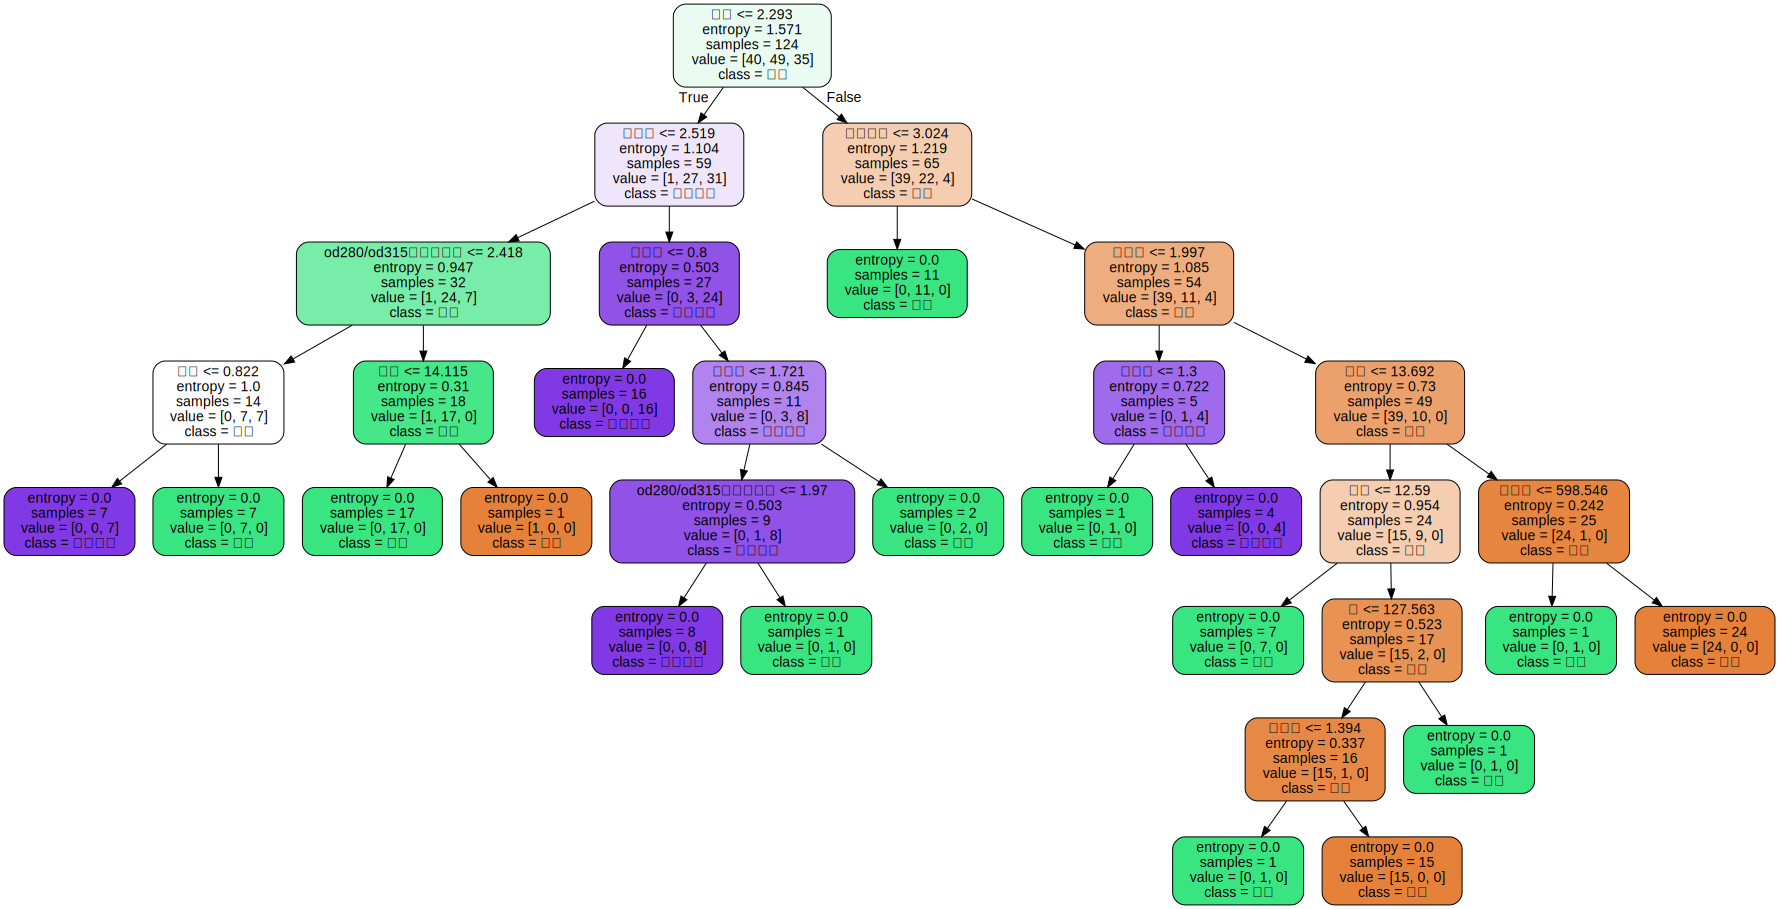

In [104]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [105]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

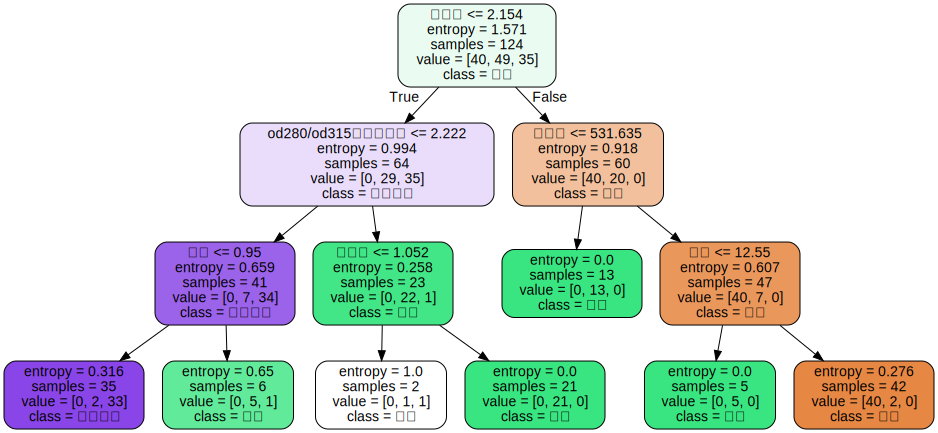

In [106]:
# 剪枝策略防止过拟合，正确的剪枝可以很好的优化模型
# max_depaht 设置树的最大参数
# min_samples_leaf 分支后每个叶子节点必须含有min-sample_leaf个样本
# min_samples_split 必须有min_sample_split个样本才能都进行分枝
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                #    ,min_samples_leaf=10
                                #    ,min_samples_split=25
                                    )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph
# max_fatures限制分支的特征个数
# min_impurity_decrease 限制信息增益的大小，信息增益小于这个值就不分支

In [107]:
score = clf.score(Xtest, Ytest)
score

0.9629629629629629

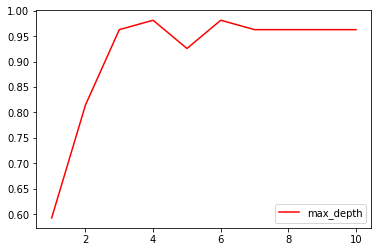

In [109]:
# 通过这样画图来寻找最好的max_depth值
# 通过这种画学习曲线的方式寻找最佳的参数
# 可以一次寻找多个参数
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [110]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([23, 34, 38, 23, 31, 13, 38, 34,  4, 10, 38, 19,  4, 38, 38,  4,  4,
       10,  8, 34, 19,  8,  4, 19, 23, 19, 19,  4, 34, 25, 23, 19, 38, 23,
       23,  8, 38, 19, 23, 19,  4, 31, 38, 38,  8, 18, 38, 19, 34, 34, 23,
       34, 18, 19])

In [111]:
#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 2, 1])

## 回归树
#### 波士顿房价数据集

In [112]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [113]:
boston = load_boston()

In [114]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [115]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [116]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [117]:
boston = load_boston()

In [118]:
regressor = DecisionTreeRegressor(random_state=0) #实例化
cross_val_score(regressor, boston.data, boston.target, cv=10).mean()

-0.029789843576721542

In [119]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [120]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [121]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [122]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10,
                scoring = "neg_mean_squared_error"
               )

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [123]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [124]:
rng = np.random.RandomState(1) #随机数种子
X = np.sort(5 * rng.rand(80,1), axis=0) #生成0~5之间随机的x的取值
y = np.sin(X).ravel() #生成正弦曲线
y[::5] += 3 * (0.5 - rng.rand(16)) #在正弦曲线上加噪声

In [125]:
y.shape

(80,)

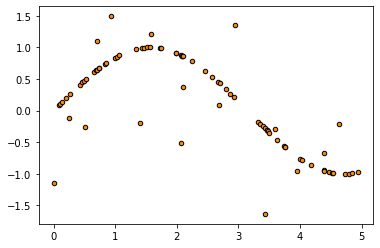

In [126]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

In [127]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)